week-1: eda and visulization of our dataset

In [1]:
import os
import glob
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def load_and_stack_all_data(base_path):
    """
    Finds all 25 label files, matches them with their 5 band files,
    loads them, stacks them, and returns two lists: one for images and one for masks.
    """
    print("--- Starting to process all 25 images ---")
    
    # --- Step 1: Get a list of all 25 label files ---
    label_files = sorted(glob.glob(os.path.join(base_path, 'label', '*.tif')))
    
    if not label_files:
        print("Error: No label files found!")
        return [], []

    print(f"Found {len(label_files)} label files to process.")
    
    all_images = []
    all_masks = []
    
    # --- Step 2: Loop through each label file path ---
    for label_path in label_files:
        
        # --- Step 3: Extract the unique ID for the current file ---
        filename = os.path.basename(label_path)
        filename_parts = filename.split('_')
        identifier = f"_{filename_parts[-2]}_{filename_parts[-1]}"
        
        # --- Step 4: Find and load the 5 corresponding bands ---
        band_folders = ['Band1', 'Band2', 'Band3', 'Band4', 'Band5']
        current_image_layers = []
        is_complete = True
        
        for folder in band_folders:
            search_pattern = os.path.join(base_path, folder, f'*{identifier}')
            found_files = glob.glob(search_pattern)
            
            if not found_files:
                print(f"--> Warning: Missing band in '{folder}' for identifier '{identifier}'. Skipping this sample.")
                is_complete = False
                break
            
            with rasterio.open(found_files[0]) as src:
                current_image_layers.append(src.read(1))
        
        # --- Step 5: If all 5 bands were found, stack them and load the mask ---
        if is_complete:
            stacked_image = np.stack(current_image_layers, axis=0)
            with rasterio.open(label_path) as src:
                mask = src.read(1)
            
            all_images.append(stacked_image)
            all_masks.append(mask)

    print(f"\n--- Processing complete ---")
    print(f"Successfully loaded {len(all_images)} complete image-mask pairs.")
    return all_images, all_masks


In [3]:

# --- Main script execution ---
if __name__ == "__main__":
    TRAIN_DATA_PATH = 'D:/GlacierHack_practice/train'
    
    # This one function now does everything for all 25 images
    images_list, masks_list = load_and_stack_all_data(TRAIN_DATA_PATH)
    
    # --- Verification ---
    if images_list:
        print(f"Shape of the first image in our list: {images_list[0].shape}")
        print(f"Shape of the first mask in our list: {masks_list[0].shape}")
    else:
        print("No data was loaded. Please check your paths and file names.")

--- Starting to process all 25 images ---
Found 25 label files to process.

--- Processing complete ---
Successfully loaded 25 complete image-mask pairs.
Shape of the first image in our list: (5, 512, 512)
Shape of the first mask in our list: (512, 512)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..65454.0].


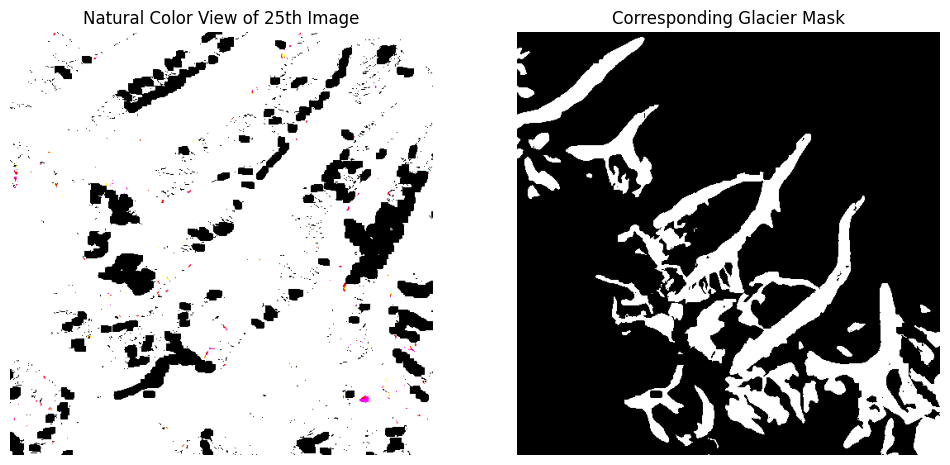

In [4]:
# to visualize the 25th image and mask.This is at index 24.
image_to_show = images_list[24]
mask_to_show = masks_list[24]

natural_color_rgb = image_to_show[[3, 2, 1], :, :]

# Reshape for matplotlib: (Channels, H, W) -> (H, W, Channels)
rgb_for_plot = np.moveaxis(natural_color_rgb, 0, -1)

# --- Create the final plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(rgb_for_plot)
axes[0].set_title("Natural Color View of 25th Image")
axes[0].axis('off')

axes[1].imshow(mask_to_show, cmap='gray')
axes[1].set_title("Corresponding Glacier Mask")
axes[1].axis('off')

plt.show()

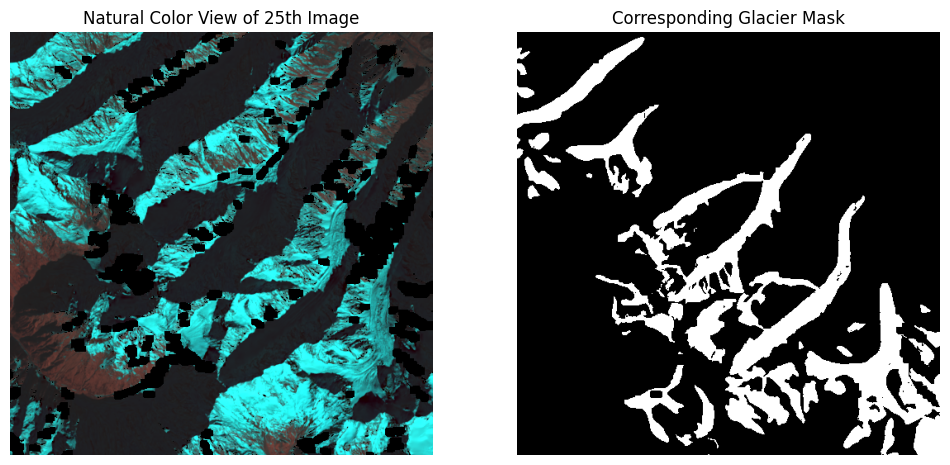

In [5]:
# to visualize the 25th image and mask.This is at index 24.
image_to_show = images_list[24]
mask_to_show = masks_list[24]

natural_color_rgb = image_to_show[[3, 2, 1], :, :]

# Reshape for matplotlib: (Channels, H, W) -> (H, W, Channels)
rgb_for_plot = np.moveaxis(natural_color_rgb, 0, -1)

# Apply contrast stretching to make the image visually clear
p2, p98 = np.percentile(rgb_for_plot, (2, 98))
rgb_for_plot = np.clip((rgb_for_plot - p2) / (p98 - p2), 0, 1)

# --- Create the final plot ---
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(rgb_for_plot)
axes[0].set_title("Natural Color View of 25th Image")
axes[0].axis('off')

axes[1].imshow(mask_to_show, cmap='gray')
axes[1].set_title("Corresponding Glacier Mask")
axes[1].axis('off')

plt.show()